In [21]:
import torch
from torch.utils.data import Subset, DataLoader
from torch.utils.data import TensorDataset

# from torchnet.dataset import TensorDataset

import numpy as np
import pandas as pd

from main import load_checkpoint
import datasets
from sklearn.metrics import mean_squared_error

PREDICT_DATA_SPLIT = 0.2


def predict_loss(recon_data, input_data):
    """
    Computes mean squared error between reconstructed data (in Tensor form) and actual input data

    @param recon_data:
    @param input_data:
    @return: int MSE
    """
    if not isinstance(recon_data, (list, np.ndarray)):
        recon_data = recon_data.values

    return mean_squared_error(input_data, recon_data)


def predict(trained_model, dataloader):
    trained_model.eval()
    modal = ["rna", "gcn", "dna"]
    uni, cross = [0, 0, 0], [0, 0, 0, 0, 0, 0]

    for i, dataT in enumerate(dataloader):
        data = [d.to(torch.device("cpu")) for d in dataT]
        recons_mat = trained_model.reconstruct_sample(data)
        for e, recons_list in enumerate(recons_mat):
            for d, recon in enumerate(recons_list):
                print("Modalities {} -> {}".format(modal[e], modal[d]))
                if e == d:  # Unimodal
                    recon = recon.squeeze(0).cpu().detach().numpy()
                    uni[e] = recon
                if e != d:
                    recon = recon.squeeze(0).cpu().detach().numpy()

                    if modal[e] == "rna":
                        if modal[d] == "gcn":
                            cross[0] = recon
                        elif modal[d] == "dna":
                            cross[1] = recon
                    elif modal[e] == "gcn":
                        if modal[d] == "rna":
                            cross[2] = recon
                        elif modal[d] == "dna":
                            cross[3] = recon
                    if modal[e] == "dna":
                        if modal[d] == "rna":
                            cross[4] = recon
                        elif modal[d] == "gcn":
                            cross[5] = recon

    return uni[0], uni[1], uni[2], cross[0], cross[1], cross[2], cross[3], cross[4], cross[5]

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [101]:
# Load in recon loss data for MOE

NUM_DECIMALS = 4
abs_path = "/Users/bram/rp-group-21-bpronk/"

# Order is lr 1e-4, 1e-3, 1e-2
# Latent 128
latent128 = ["experiments/shuffle_grid_search/MoE lr 1e-4 latent128/14-06-2021 08:26:13q6w0c0s5", "experiments/shuffle_grid_search/MoE lr 1e-3 latent128/14-06-2021 10:56:08izjoymw5", "experiments/shuffle_grid_search/MoE lr 1e-2 latent128/14-06-2021 12:27:42go55ruz4"]

# Latent 64

latent64 = ["experiments/shuffle_grid_search/MoE lr 1e-4 latent64/15-06-2021 09:39:00oxi2o7q0", "experiments/shuffle_grid_search/MoE lr 1e-3 latent64/15-06-2021 16:07:46a5b9axoo" , "experiments/shuffle_grid_search/MoE lr 1e-2 latent64/15-06-2021 16:41:4255txdrfn"]

# Latent 32

latent32 = ["experiments/shuffle_grid_search/MoE lr 1e-4 latent32/15-06-2021 17:36:45h8jjy56w", "experiments/shuffle_grid_search/MoE lr 1e-3 latent32/15-06-2021 18:27:18972knr_6", "experiments/shuffle_grid_search/MoE lr 1e-2 latent32/15-06-2021 19:11:22qjy7xypz"]
results_128 = [0, 0, 0]
results_64 = [0, 0, 0]
results_32 = [0, 0, 0]

for i in range(len(latent128)):
    # Get last reconstruction loss
    rna = np.round(np.load(abs_path + latent128[i] + "/Recon array rna_rna.npy")[-1], NUM_DECIMALS)
    gcn = np.round(np.load(abs_path + latent128[i] + "/Recon array gcn_gcn.npy")[-1], NUM_DECIMALS)
    dna = np.round(np.load(abs_path + latent128[i] + "/Recon array dna_dna.npy")[-1], NUM_DECIMALS)
    
    avg = np.round((rna + gcn + dna) / 3, NUM_DECIMALS)
    results_128[i] = avg

print("results_128 = ", results_128)

for i in range(len(latent64)):
    # Get last reconstruction loss
    if latent64[i] == "":
        continue
        
    rna = np.round(np.load(abs_path + latent64[i] + "/Recon array rna_rna.npy")[-1], NUM_DECIMALS)
    gcn = np.round(np.load(abs_path + latent64[i] + "/Recon array gcn_gcn.npy")[-1], NUM_DECIMALS)
    dna = np.round(np.load(abs_path + latent64[i] + "/Recon array dna_dna.npy")[-1], NUM_DECIMALS)
    
    avg = np.round((rna + gcn + dna) / 3, NUM_DECIMALS)
    results_64[i] = avg

print("results_64 = ", results_64)

for i in range(len(latent32)):
    # Get last reconstruction loss
    if latent32[i] == "":
        continue
        
    rna = np.round(np.load(abs_path + latent32[i] + "/Recon array rna_rna.npy")[-1], NUM_DECIMALS)
    gcn = np.round(np.load(abs_path + latent32[i] + "/Recon array gcn_gcn.npy")[-1], NUM_DECIMALS)
    dna = np.round(np.load(abs_path + latent32[i] + "/Recon array dna_dna.npy")[-1], NUM_DECIMALS)
    
    avg = np.round((rna + gcn + dna) / 3, NUM_DECIMALS)
    results_32[i] = avg

print("results_32 = ", results_32)

recon_losses = np.array((results_128, results_64, results_32))

print("Recon losses = ", recon_losses)
    

results_128 =  [0.3706, 0.3706, 0.3706]
results_64 =  [0.3703, 0.3703, 0.3703]
results_32 =  [0.3705, 0.3705, 0.3705]
Recon losses =  [[0.3706 0.3706 0.3706]
 [0.3703 0.3703 0.3703]
 [0.3705 0.3705 0.3705]]


Text(0, 0.5, 'Mean Squared Error')

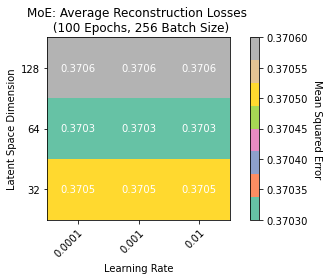

In [102]:
lr_x = ["0.0001", "0.001", "0.01"]
latent_y = ["128", "64", "32"]

fig, ax = plt.subplots()
im = ax.imshow(recon_losses, cmap="Set2")

# We want to show all ticks...
ax.set_xticks(np.arange(len(lr_x)))
ax.set_yticks(np.arange(len(latent_y)))
# ... and label them with the respective list entries
ax.set_xticklabels(lr_x)
ax.set_yticklabels(latent_y)
ax.set_xlabel("Learning Rate")
ax.set_ylabel("Latent Space Dimension")

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(latent_y)):
    for j in range(len(lr_x)):
        text = ax.text(j, i, recon_losses[i, j],
                       ha="center", va="center", color="w")

ax.set_title("MoE: Average Reconstruction Losses \n (100 Epochs, 256 Batch Size)")
fig.tight_layout()

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Mean Squared Error", rotation=-90, va="bottom")

(3, 4)


Text(0, 0.5, 'Mean Squared Error')

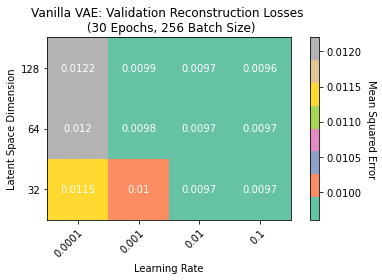

In [87]:
lr_x = ["0.0001", "0.001", "0.01", "0.1"]
latent_y = ["128", "64", "32"]


recon_losses_vanilla_vae = np.array(([0.0122, 0.0099, 0.0097, 0.0096],
                                     [0.0120, 0.0098, 0.0097, 0.0097],
                                     [0.0115, 0.0100, 0.0097, 0.0097]))

print(recon_losses_vanilla_vae.shape)

fig, ax = plt.subplots()
im = ax.imshow(recon_losses_vanilla_vae, cmap="Set2")

# We want to show all ticks...
ax.set_xticks(np.arange(len(lr_x)))
ax.set_yticks(np.arange(len(latent_y)))
# ... and label them with the respective list entries
ax.set_xticklabels(lr_x)
ax.set_yticklabels(latent_y)
ax.set_xlabel("Learning Rate")
ax.set_ylabel("Latent Space Dimension")

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(latent_y)):
    for j in range(len(lr_x)):

        text = ax.text(j, i, recon_losses_vanilla_vae[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Vanilla VAE: Validation Reconstruction Losses \n (30 Epochs, 256 Batch Size)")
fig.tight_layout()

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Mean Squared Error", rotation=-90, va="bottom")

(3, 4)


Text(0, 0.5, 'Mean Squared Error')

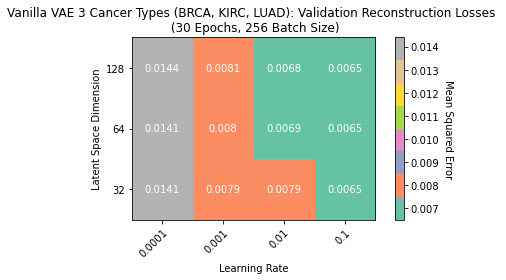

In [100]:
lr_x = ["0.0001", "0.001", "0.01", "0.1"]
latent_y = ["128", "64", "32"]


vanilla_cancer3 = np.array(([0.0144, 0.0081, 0.0068, 0.0065],
                            [0.0141, 0.0080, 0.0069, 0.0065],
                            [0.0141, 0.0079, 0.0079, 0.0065]))

print(vanilla_cancer3.shape)

fig, ax = plt.subplots()
im = ax.imshow(vanilla_cancer3, cmap="Set2")

# We want to show all ticks...
ax.set_xticks(np.arange(len(lr_x)))
ax.set_yticks(np.arange(len(latent_y)))
# ... and label them with the respective list entries
ax.set_xticklabels(lr_x)
ax.set_yticklabels(latent_y)
ax.set_xlabel("Learning Rate")
ax.set_ylabel("Latent Space Dimension")

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(latent_y)):
    for j in range(len(lr_x)):

        text = ax.text(j, i, vanilla_cancer3[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Vanilla VAE 3 Cancer Types (BRCA, KIRC, LUAD): Validation Reconstruction Losses \n (30 Epochs, 256 Batch Size)")
fig.tight_layout()

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Mean Squared Error", rotation=-90, va="bottom")